# Домашнее задание: Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели.

датасет: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Предобработка данных: 
- Обработка категориальных признаков: LabelEncoder и one-hot encoding (**one-hot encoding показал результат лучше**)
- Заполнение недостающих значений в reviews_per_month производилось **медианой** (из-за смещения выборки)
- Для нормализации распредения цены применялось **логарифмирование** <font color="red">(не помогло)</font>
- Создана новая переменная расстояние до Центрального парка/Стейт Айслэнд/Манхэтэн <font color="red">(не помогло)</font>, признак оказался не значимым ни до одной из локаций
- Скалирование производлось при помощи StandardScaler/RobustScaler/MaxAbsScaler/Normalizer (все четыре метода показали почти одинаковый результат, но в целом повысить качество помогло)

Моделирование данных:
- простая линейная регрессия, RidgeCV, LassoCV и ElasticNetCV (все методы показали примерно одинаковый результат)

Результаты:  
самое лучшее что удалось получить(плохой результат):  
- Model: LinearRegression
- R2 score: 0.10819161291435342 
- MAE: 59.36365908782323 
- RMSE: 217.01993016620358  
<br><br>
- Model: RidgeCV 
- R2 score: 0.10789447175124334 
- MAE: 59.36776007332494 
- RMSE: 217.05608153280832  
<br><br>
- Model: LassoCV 
- R2 score: 0.10665056393121708 
- MAE: 59.3247455972532 
- RMSE: 217.207354950771  
<br><br>
- Model: ElasticNetCV 
- R2 score: 0.10716149848495116 
- MAE: 59.335926467240526 
- RMSE: 217.1452322185661  
<br>
Модели объясняют 10% вариаций целевой переменной и очень большие ошибки MAE и RMSE  

<font color="grey">если не учитывать в моделях, что цена была залогорифмирована, то результат будет лучше (но так понимаю, это некорректно, потому что цена была прологорифмирована):</font>   
- <font color="grey">Model: LinearRegression</font>   
- <font color="grey">R2 score: 0.5411299925082564</font>   
- <font color="grey">MAE: 0.337621591384646</font>   
- <font color="grey">RMSE: 0.4657547728933685</font> 

Из моделей можно сделать вывод, что район и тип жилья играют большую роль


## 1. Датасет

In [185]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('AB_NYC_2019.csv')
data = data.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])
data.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [4]:
data.describe()

latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            24.000000           2.020000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [5]:
data.count()

neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [6]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

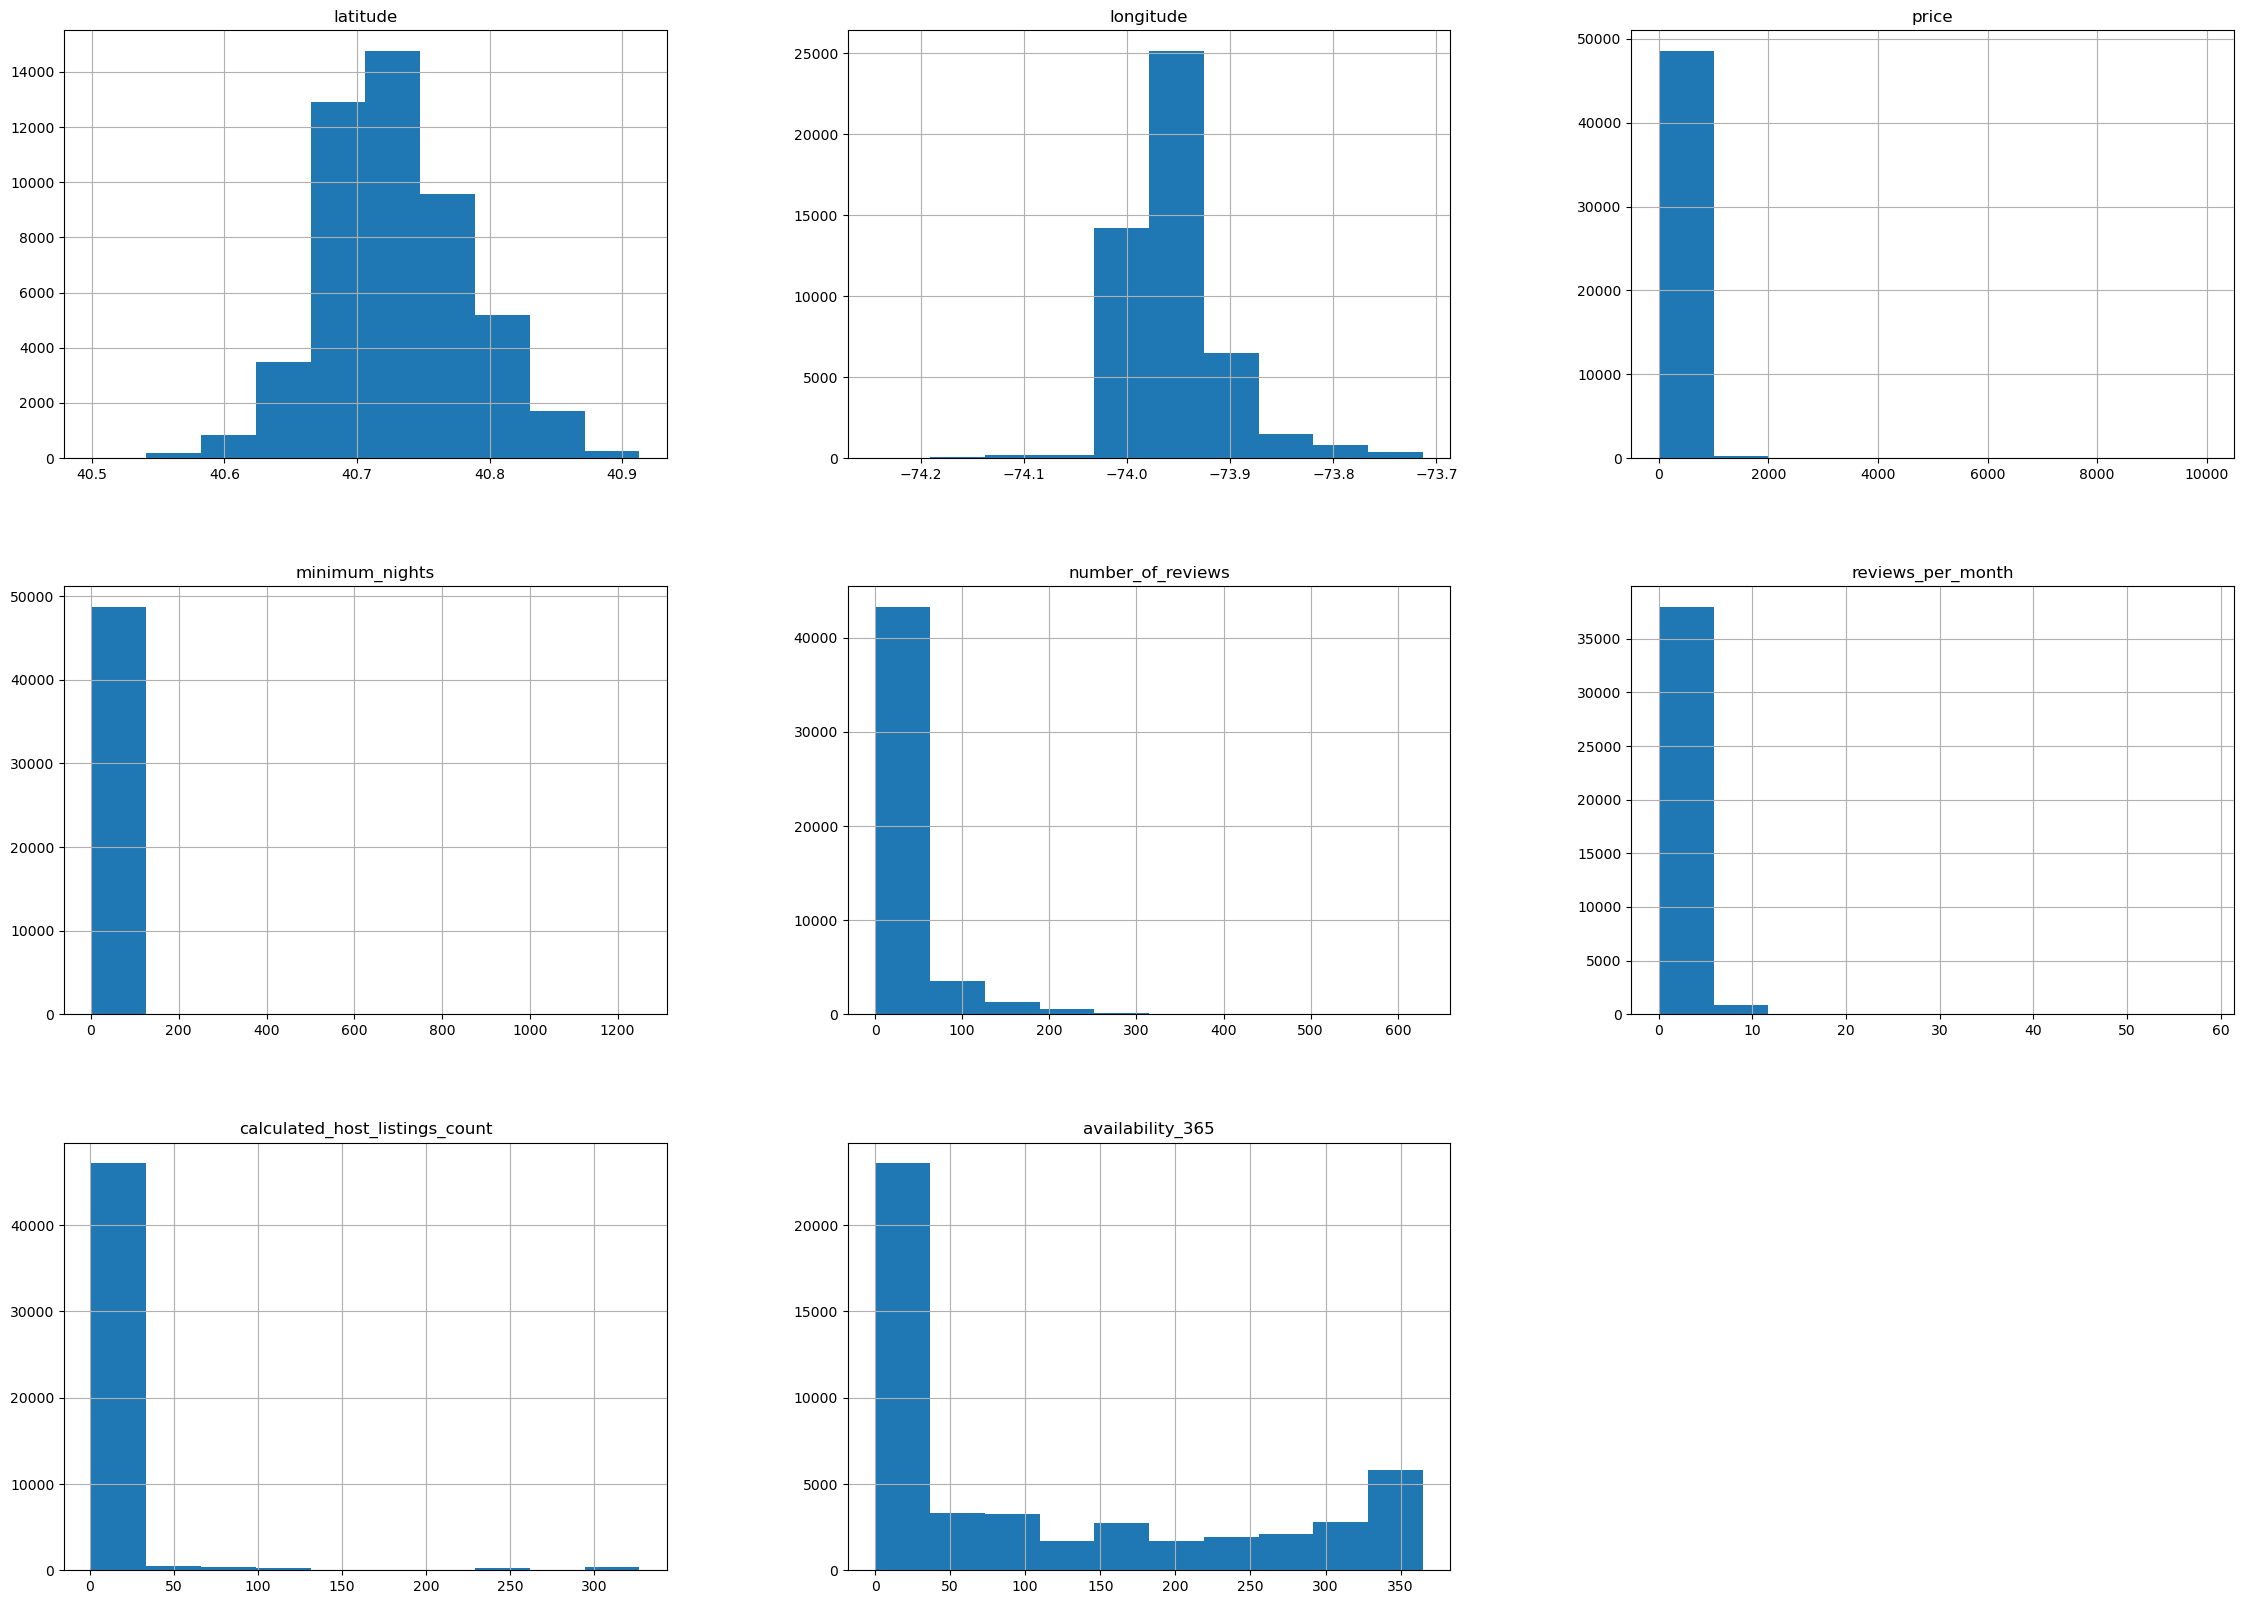

In [7]:
data.hist(figsize=(28, 20));

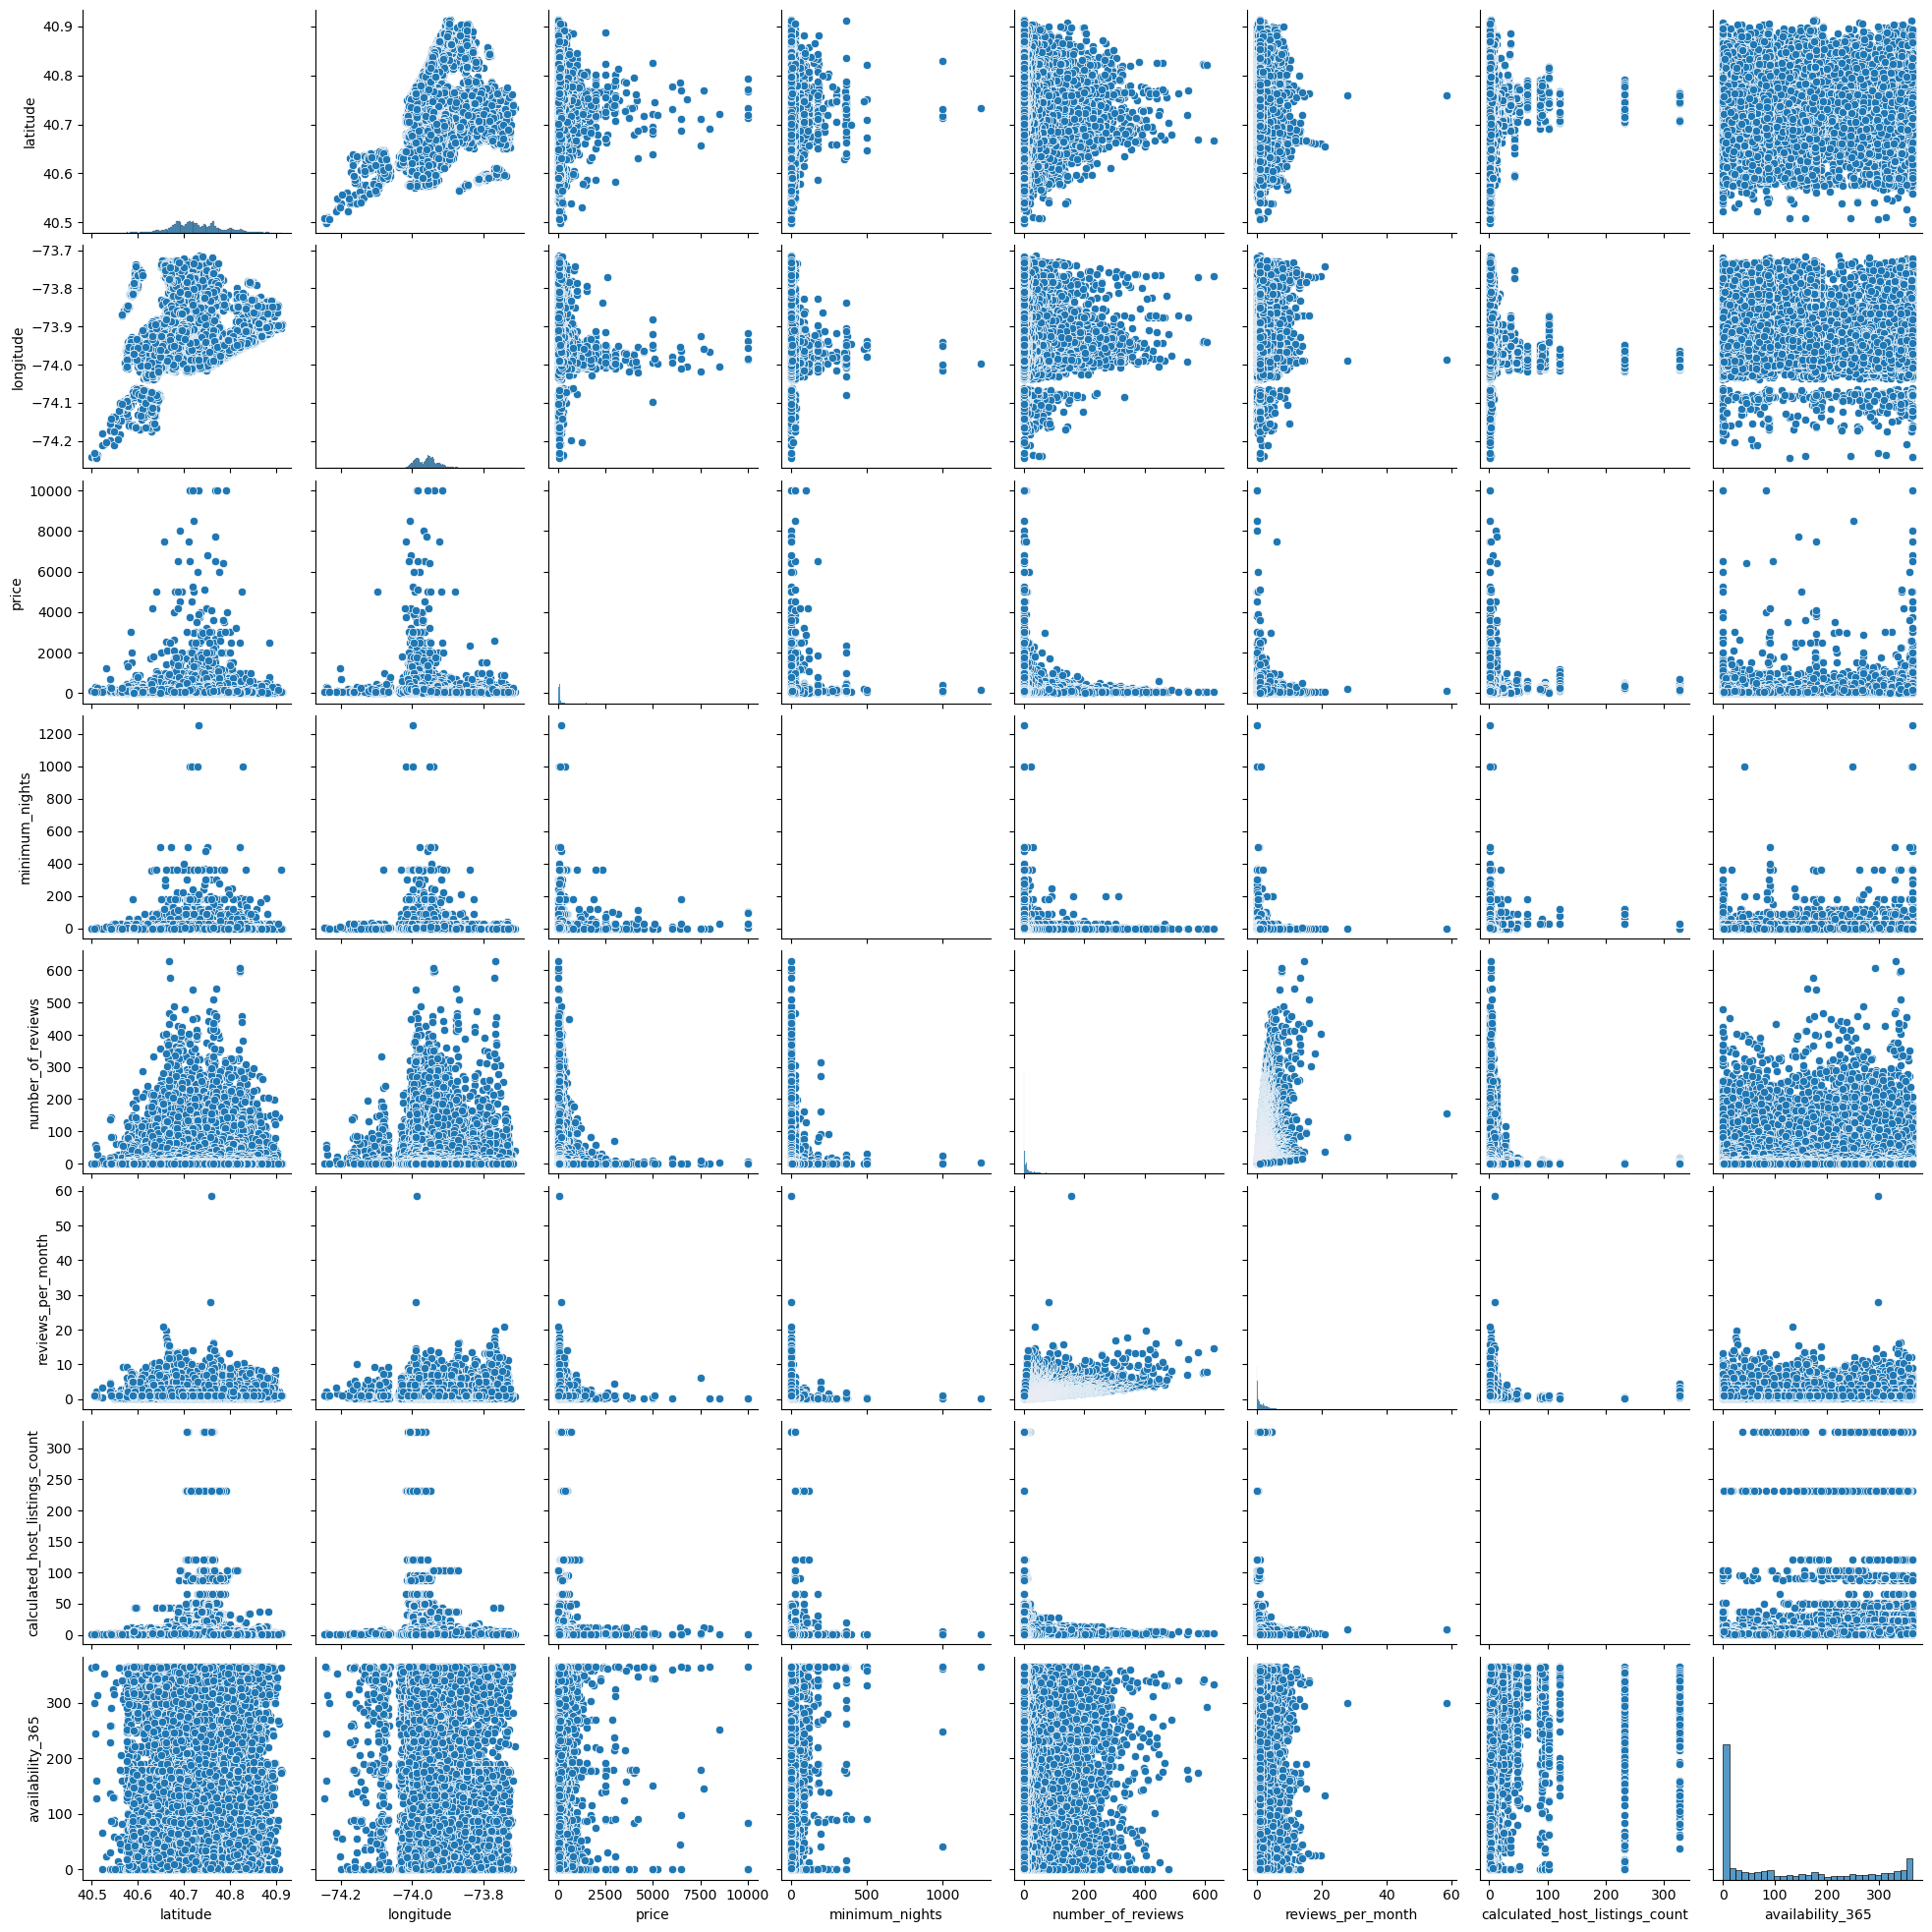

In [8]:
sns.pairplot(data);

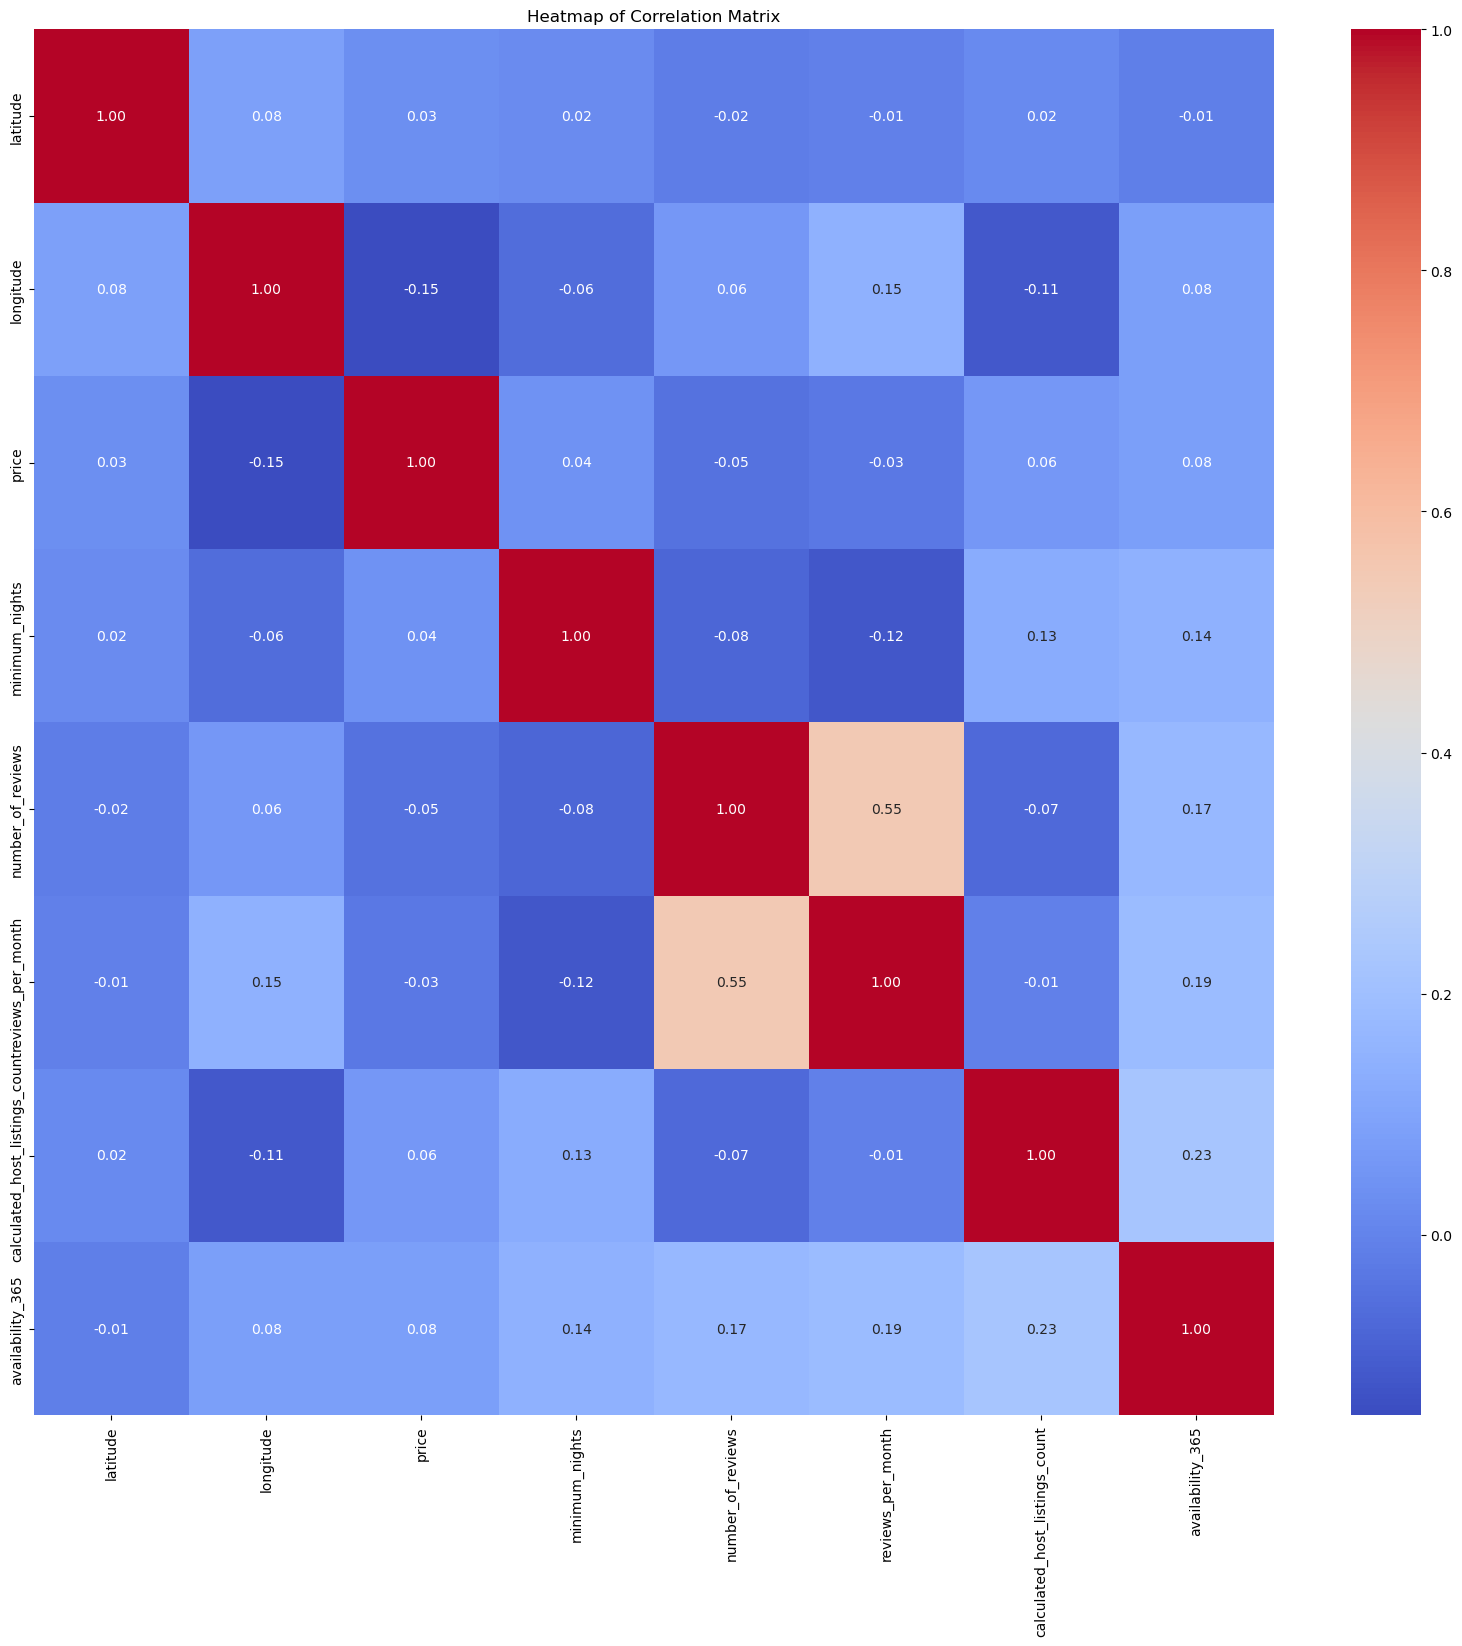

In [9]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Предобработка переменных

In [186]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Преобразуем каждую категориальную колонку
#for column in data.columns:
#    if column in ['neighbourhood_group', 'neighbourhood', 'room_type']:
#        data[column] = label_encoder.fit_transform(data[column])

data_encoded = pd.get_dummies(data, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
data_encoded.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
0                          0                             1  ...   
1                          0                             0  ...   
2                          0                             0  ...   
3                          0                             1  ...   
4                          0                             0  ...   

   neighbourhood_Williamsburg  neighbourhood_Willowbrook  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   neighbourhood_Woodlawn  neighbourhood_Woodrow  neighbourhood_Woodside  \
0                       0                      0                       0   
1                       0                      0                       0   
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                          0                       1                      0  
1                          1                       0                      0  
2                          0                       1                      0  
3                          1                       0                      0  
4                          1                       0                      0  

[5 rows x 237 columns]

In [187]:
data = data_encoded

In [188]:
# заполняем недостающие значения в reviews_per_month медианой из-за смещения выборки
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].median())
data.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.72                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  ...  \
0                          0                             1  ...   
1                          0                             0  ...   
2                          0                             0  ...   
3                          0                             1  ...   
4                          0                             0  ...   

   neighbourhood_Williamsburg  neighbourhood_Willowbrook  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   neighbourhood_Woodlawn  neighbourhood_Woodrow  neighbourhood_Woodside  \
0                       0                      0                       0   
1                       0                      0                       0   
2                       0                      0                       0   
3                       0                      0                       0   
4                       0                      0                       0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                          0                       1                      0  
1                          1                       0                      0  
2                          0                       1                      0  
3                          1                       0                      0  
4                          1                       0                      0  

[5 rows x 237 columns]

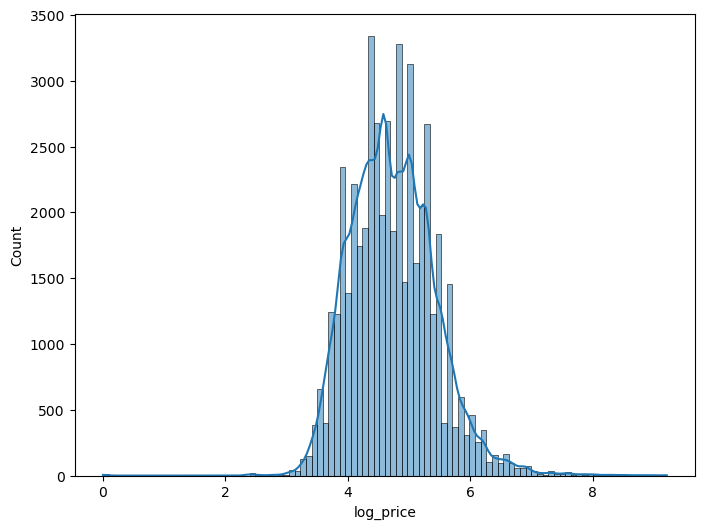

In [189]:
import numpy as np
data['log_price'] = np.log1p(data['price'])

plt.figure(figsize=(8,6))
sns.histplot(data['log_price'], bins=100, kde=True)
plt.show()
#!!!! predicted_prices = np.expm1(predicted_log_prices)

In [190]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

#central_park_lon = -73.968285
#central_park_lat = 40.785091


central_park_lon = 73.9712
central_park_lat = 40.7831


data['distance_to_central_park'] = data.apply(lambda row: haversine(central_park_lon, central_park_lat, row['longitude'], row['latitude']), axis=1)

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['log_price','price'], axis=1), data['log_price'], test_size=0.30, random_state=69
    #data.drop(['price'], axis=1), data['price'], test_size=0.30, random_state=69
)

In [192]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34226, 237), (14669, 237), (34226,), (14669,))

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# модели
models = [LinearRegression(), 
          RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]), 
          LassoCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]), 
          ElasticNetCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000])]

model_names = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

# обучение моделей и вычисление метрик 
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    print(f'Model: {name}')
    print(f'R2 score: {r2_score(y_test, predictions)}')
    print(f'MAE: {mean_absolute_error(y_test, predictions)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, predictions))}\n')

Model: LinearRegression
R2 score: 0.5411299925082564
MAE: 0.337621591384646
RMSE: 0.4657547728933685

Model: RidgeCV
R2 score: 0.5407909632541223
MAE: 0.3376635078220357
RMSE: 0.4659267991046169



D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.53326354965793, tolerance: 1.334730687789157
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.656138802327405, tolerance: 1.338097156714655
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.222481853005775, tolerance: 1.3327176783951817
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614

Model: LassoCV
R2 score: 0.5407951240488709
MAE: 0.3376294715693427
RMSE: 0.465924688268358



D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5432843817125104, tolerance: 1.334730687789157
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.40457090061136, tolerance: 1.334730687789157
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5044315049590296, tolerance: 1.338097156714655
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: 

Model: ElasticNetCV
R2 score: 0.5408024332737232
MAE: 0.3375814038754846
RMSE: 0.46592098016110467



In [195]:
from math import sqrt

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# модели
models = [LinearRegression(), 
          RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]), 
          LassoCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]), 
          ElasticNetCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000])]

model_names = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)
    # Transforming predictions back to the original scale
    original_scale_predictions = np.expm1(predictions)

    print(f'Model: {name}')
    print(f'R2 score: {r2_score(np.expm1(y_test), original_scale_predictions)}')
    print(f'MAE: {mean_absolute_error(np.expm1(y_test), original_scale_predictions)}')
    print(f'RMSE: {sqrt(mean_squared_error(np.expm1(y_test), original_scale_predictions))}\n')

Model: LinearRegression
R2 score: 0.10819161291435342
MAE: 59.36365908782323
RMSE: 217.01993016620358

Model: RidgeCV
R2 score: 0.10789447175124334
MAE: 59.36776007332494
RMSE: 217.05608153280832



D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.53326354965793, tolerance: 1.334730687789157
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.656138802327405, tolerance: 1.338097156714655
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.222481853005775, tolerance: 1.3327176783951817
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614

Model: LassoCV
R2 score: 0.10665056393121708
MAE: 59.3247455972532
RMSE: 217.207354950771



D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5432843817125104, tolerance: 1.334730687789157
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.40457090061136, tolerance: 1.334730687789157
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5044315049590296, tolerance: 1.338097156714655
  model = cd_fast.enet_coordinate_descent_gram(
D:\Users\Kamil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: 

Model: ElasticNetCV
R2 score: 0.10716149848495116
MAE: 59.335926467240526
RMSE: 217.1452322185661



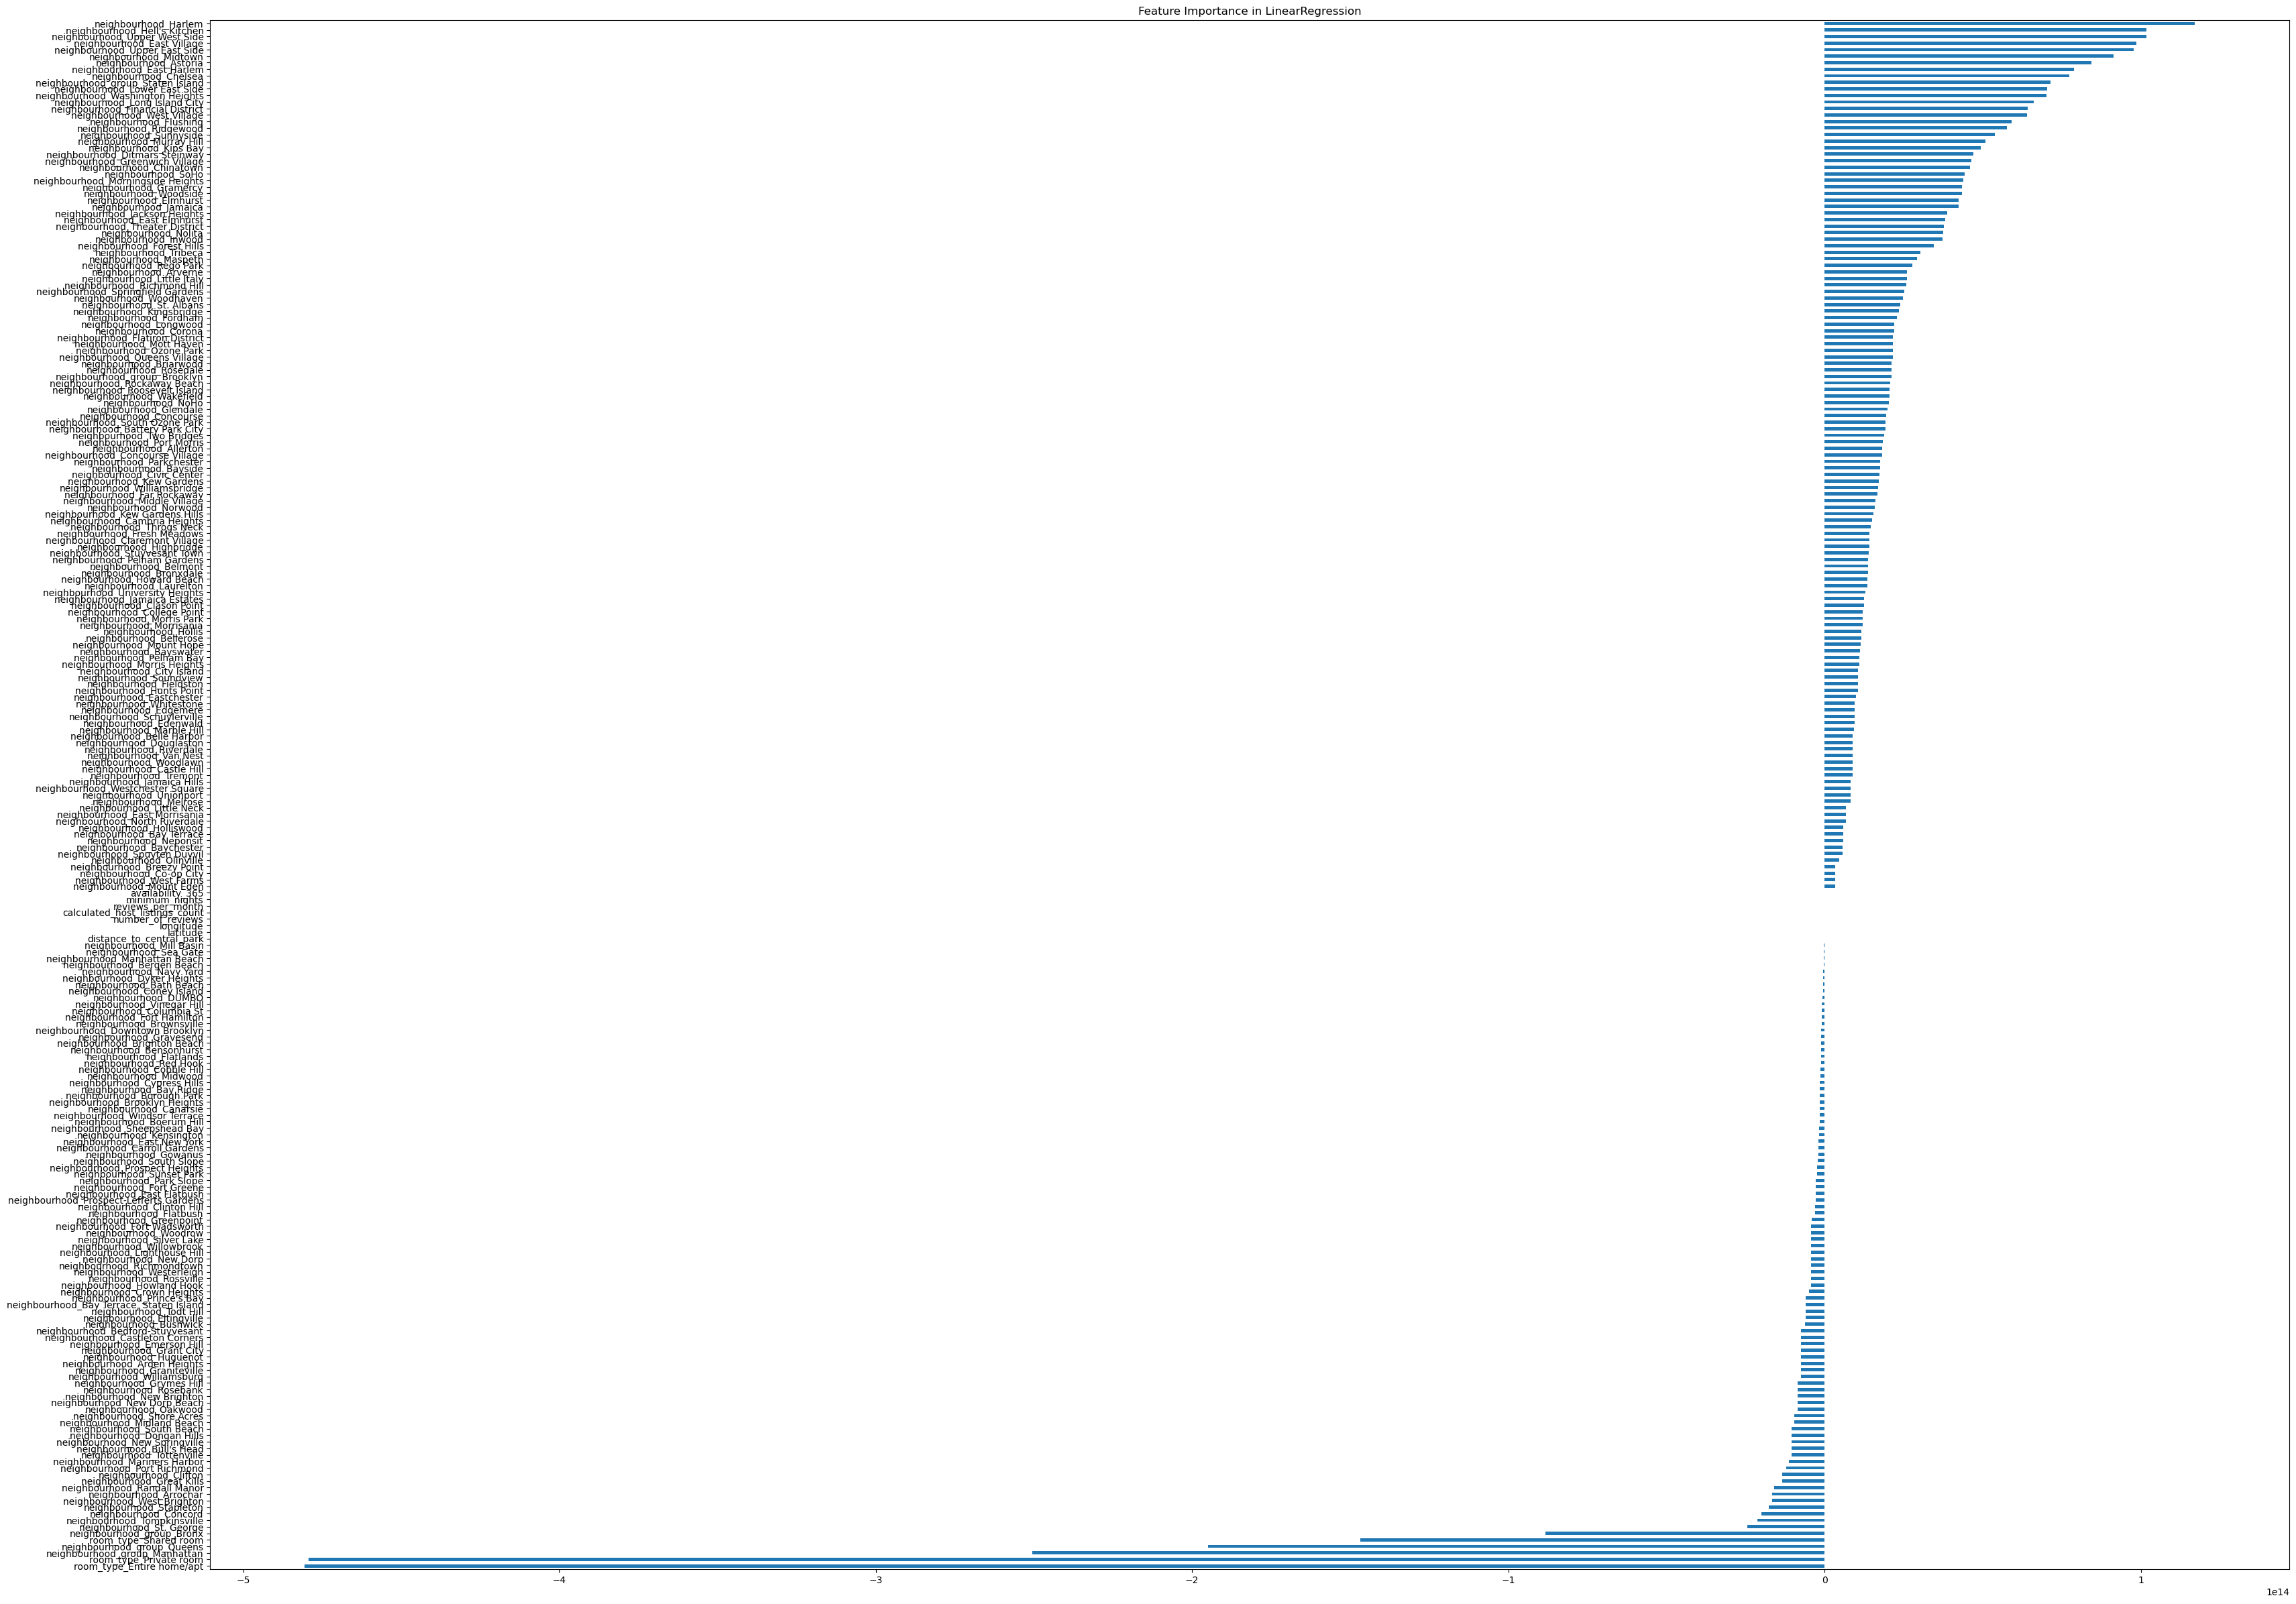

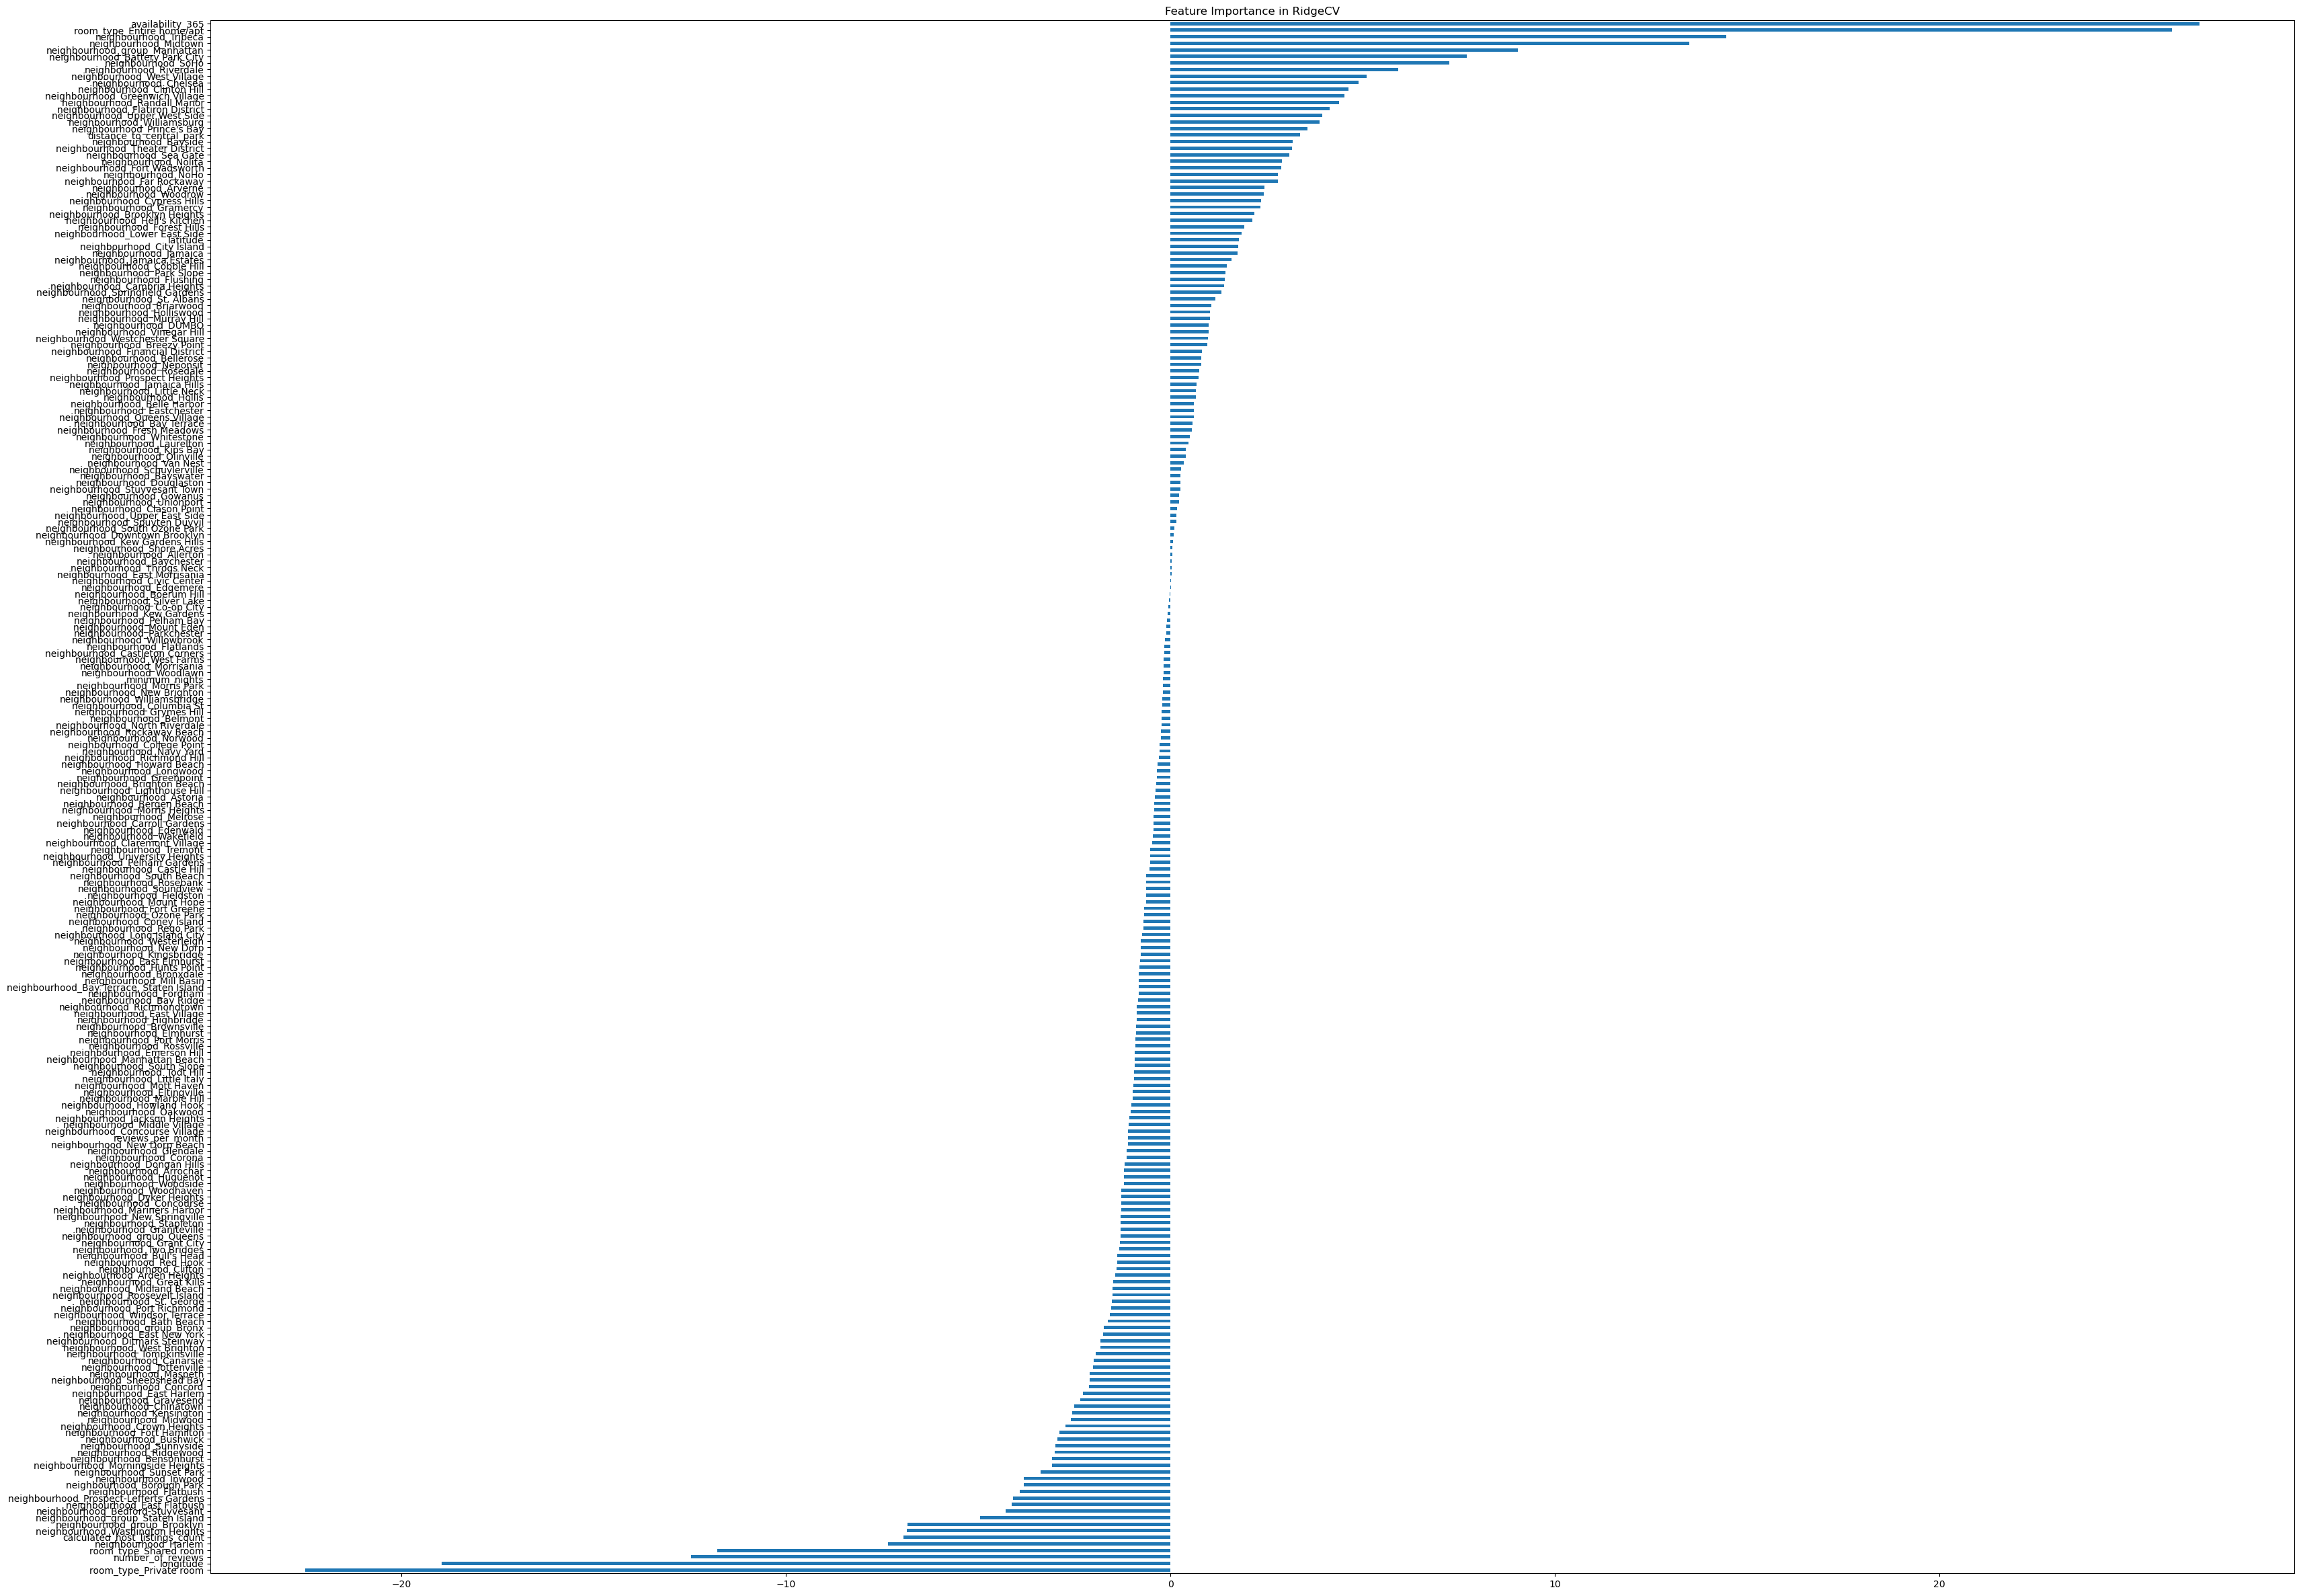

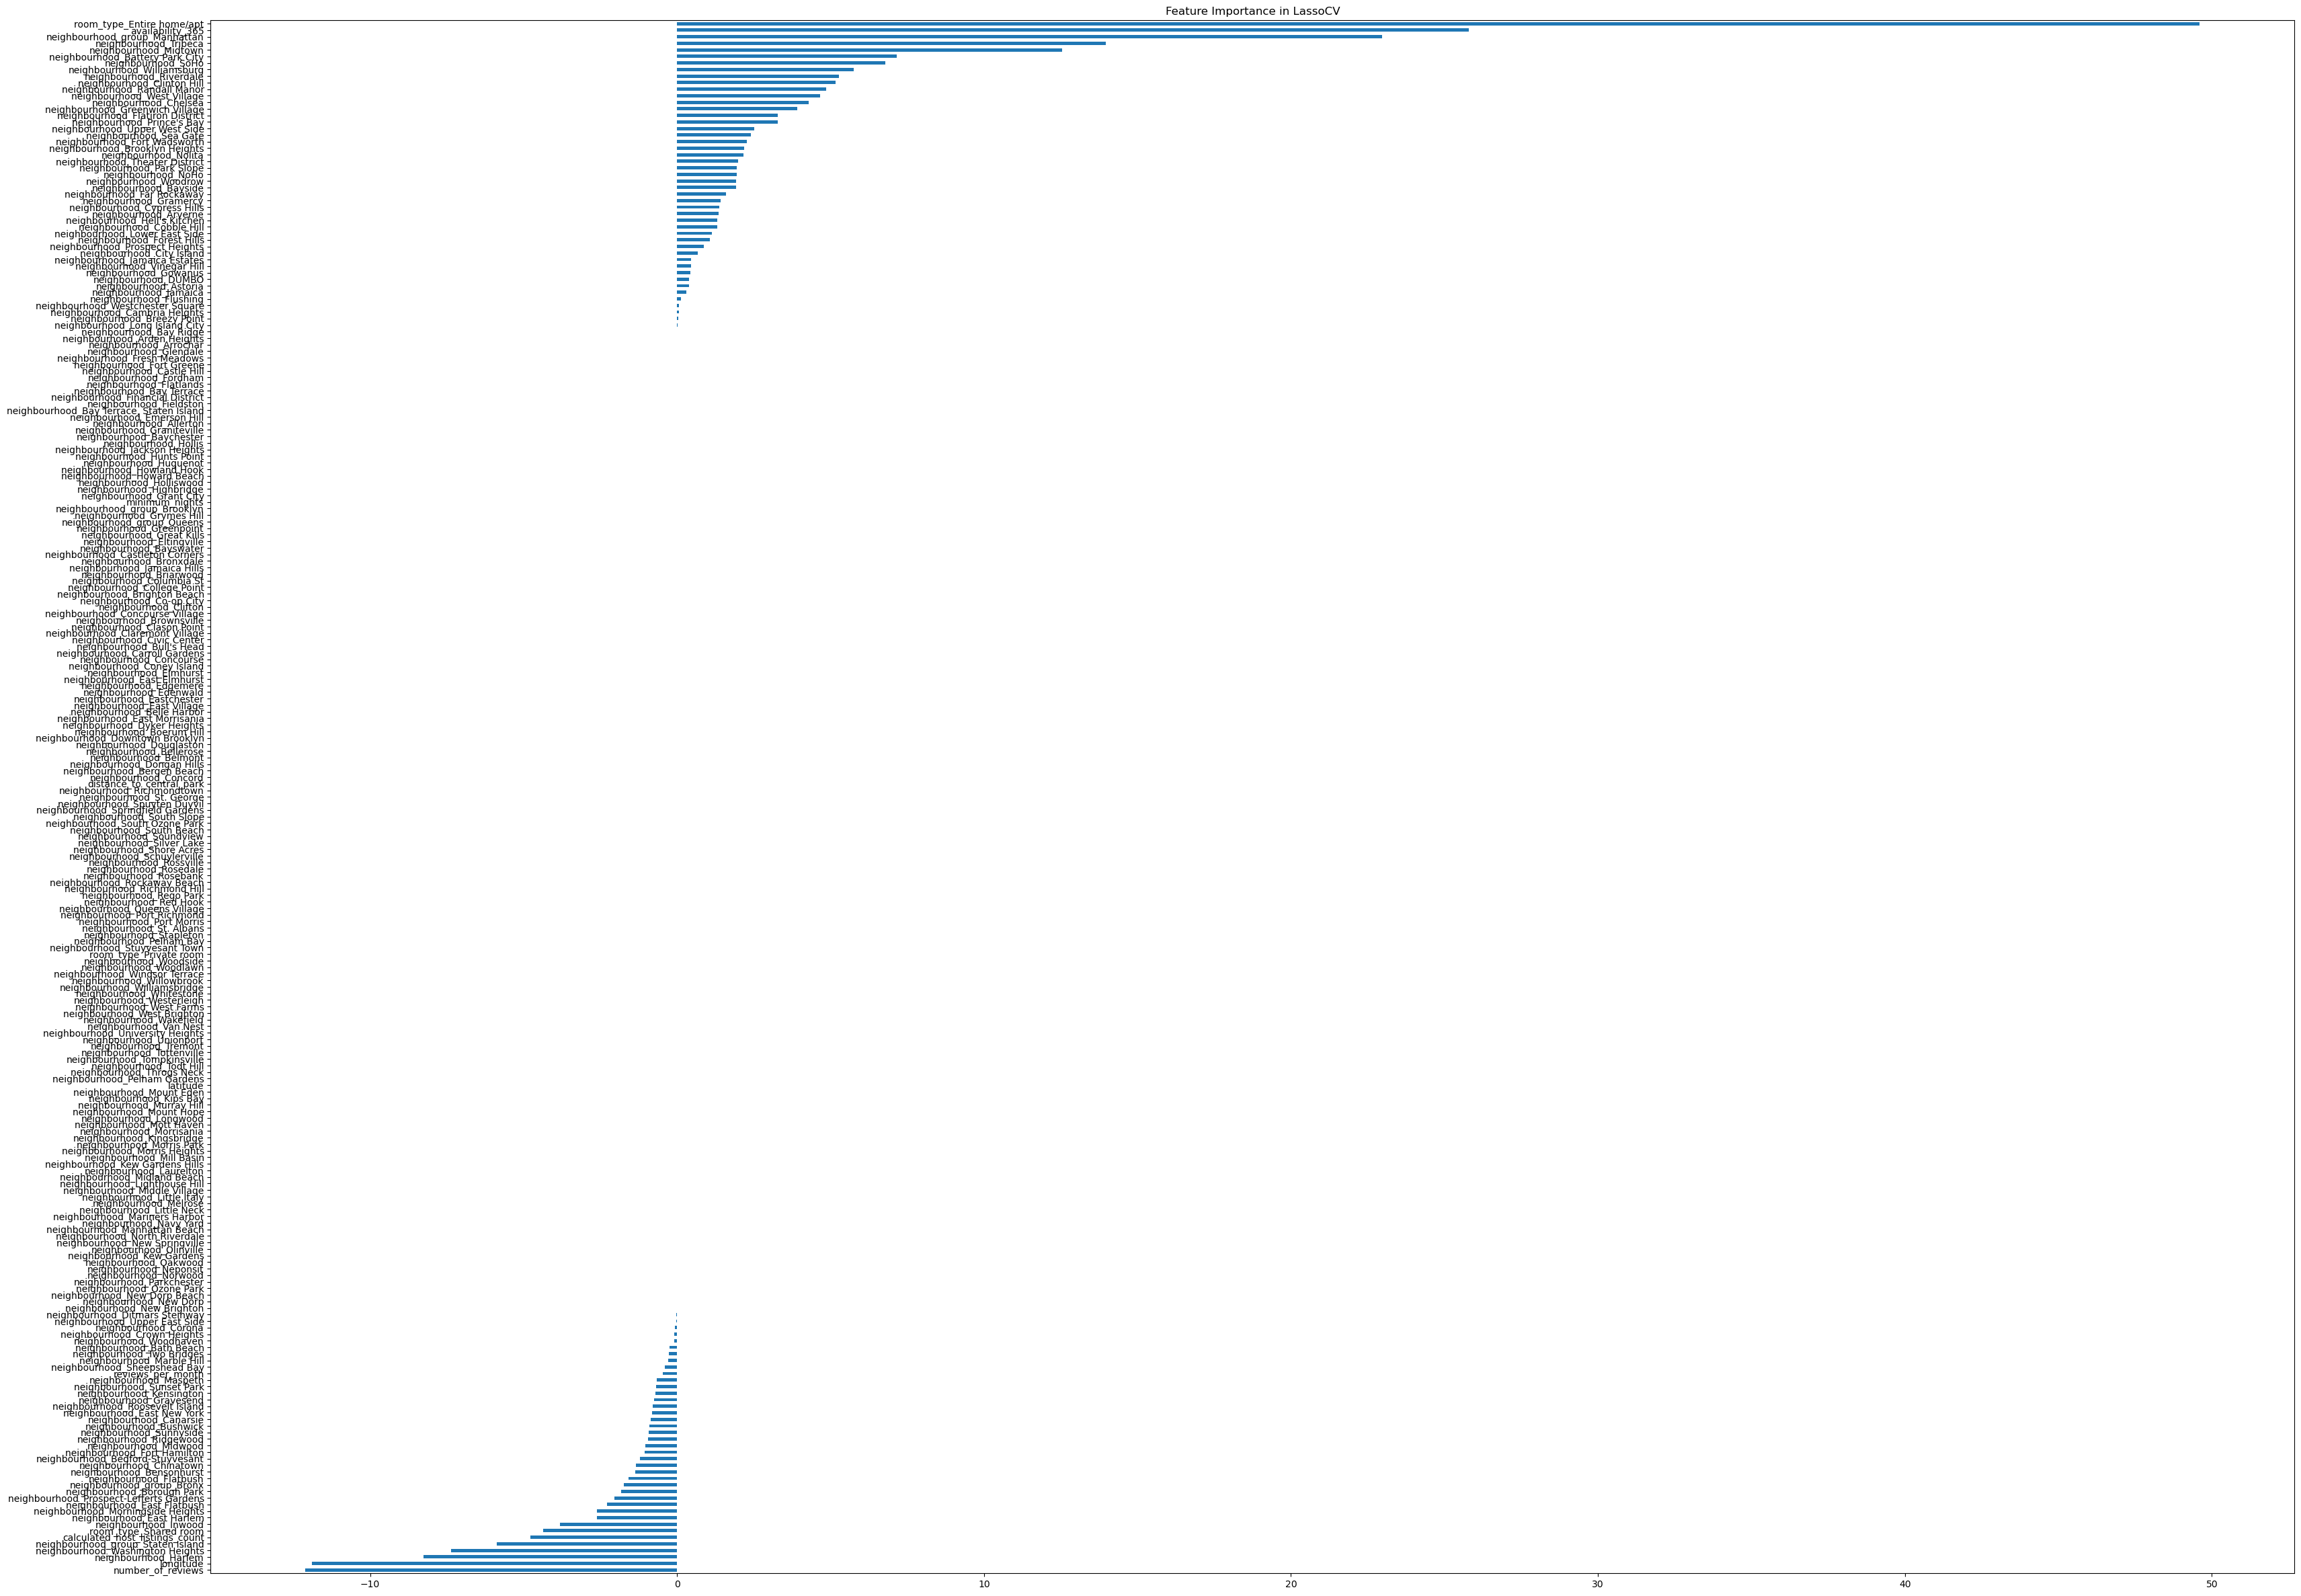

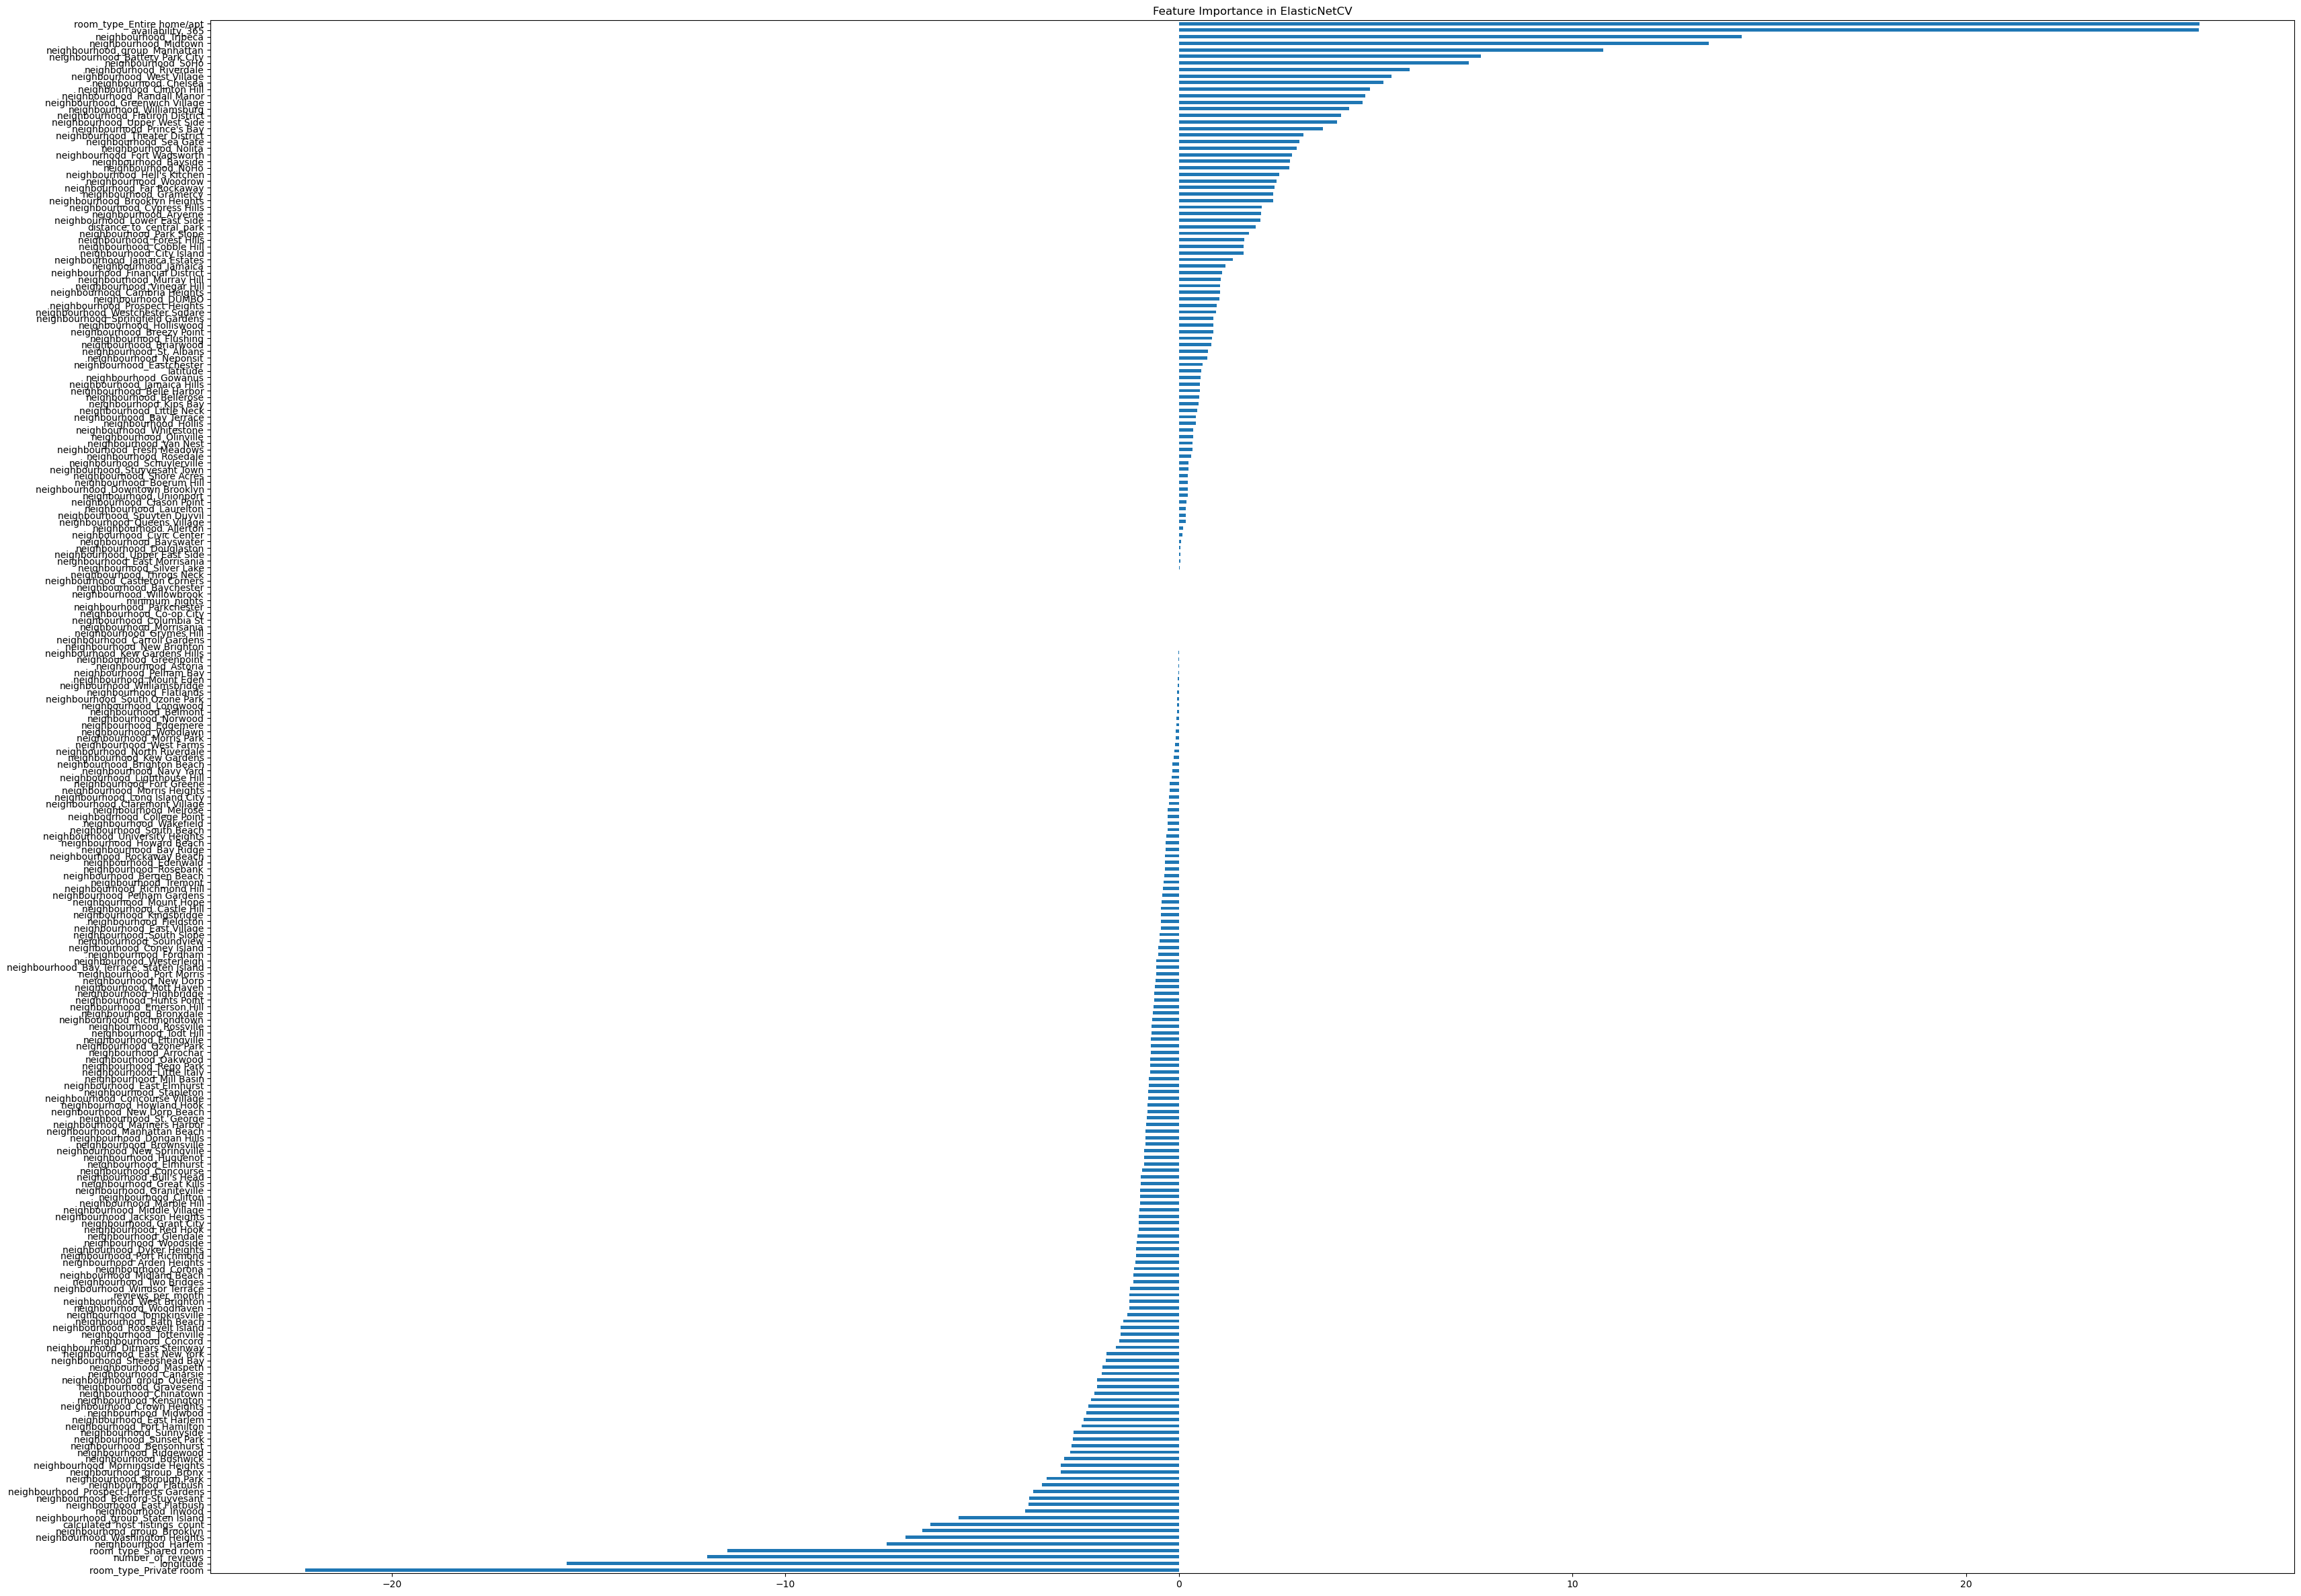

In [153]:
import matplotlib.pyplot as plt
import numpy as np

models_coef = [model.coef_ for model in models]

for coef, name in zip(models_coef, model_names):
    series = pd.Series(coef, index = X_train.columns)
    # we only plot the largest 10 coef
    series = series.sort_values()
    plt.figure(figsize=(40, 30))
    series.plot(kind='barh')
    plt.title(f"Feature Importance in {name}")
    plt.show()